-- when having too many columns; consider performing feature selection.


In [2]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import gdown

pd. set_option('display.max_columns', None)

In [3]:
file_id_1 = "1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o"
output_file_1 = "train.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id_1}", output_file_1)

Downloading...
From: https://drive.google.com/uc?id=1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o
To: /content/train.csv
100%|██████████| 4.08M/4.08M [00:00<00:00, 29.8MB/s]


'train.csv'

In [4]:
file_id_2 = "1_UcKxtt68lo-SFiIgAKE75G35zib5sSs"
output_file_2 = "test.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id_2}", output_file_2)

Downloading...
From: https://drive.google.com/uc?id=1_UcKxtt68lo-SFiIgAKE75G35zib5sSs
To: /content/test.csv
100%|██████████| 445k/445k [00:00<00:00, 7.19MB/s]


'test.csv'

#Loading Dataset

In [5]:
# Load the dataset
fake_news_data = pd.read_csv('train.csv')
fake_news_data.head(10)

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971,_5_,"[1, 0]",_NEG_
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,NEGATIVE,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604,_6_,"[0, 1]",_NEG_
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",NEGATIVE,-0.2,0.2,0.021023,0.077569,0.032182,0.038037,0.438594,_2_,"[0, 1]",_NEG_
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,NEGATIVE,-0.3,0.3,0.116767,0.099105,0.219329,0.051303,0.114302,_7_,"[0, 1]",_NEG_
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,NEGATIVE,-0.4,0.4,0.163977,0.101336,0.109979,0.330754,0.203412,_8_,"[1, 0]",_NEG_


In [7]:
# Load the dataset
fake_news_data = pd.read_csv('train.csv')
fake_news_data

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference,NEGATIVE,-0.2,0.2,0.039024,0.103790,0.104699,0.046181,0.758238,_4_,"[0, 1]",_NEG_
11515,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,NEGATIVE,-0.7,0.7,0.064967,0.180882,0.074947,0.054953,0.710395,_8_,"[1, 0]",_NEG_
11516,401.json,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0.0,1.0,0.0,2.0,0.0,a television ad,NEGATIVE,-0.8,0.8,0.085547,0.053017,0.248317,0.319548,0.354095,_437_,"[1, 0]",_NEG_
11517,1055.json,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.,POSITIVE,0.1,0.5,0.074988,0.148645,0.316695,0.062320,0.169428,_661_,"[0, 1]",_POS_


#EDA

## Heading 2

In [ ]:
fake_news_data.shape

(9978, 25)

In [ ]:
fake_news_data['sentiment_code'].value_counts()

sentiment_code
_NEG_    8564
_POS_    1414
Name: count, dtype: int64

In [ ]:
fake_news_data.columns

Index(['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job',
       'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
       'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
       'context', 'sentiment', 'sentiment_score', 'sentiment_magnitude',
       'anger', 'fear', 'joy', 'disgust', 'sad', 'speaker_id', 'list',
       'sentiment_code'],
      dtype='object')

In [ ]:
# Check for missing values
fake_news_data.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             2806
state_info              2157
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                   92
sentiment                  0
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code             0
dtype: int64

#Data Cleaning

In [ ]:
# Drop rows with missing values
fake_news_data.dropna(subset=['sentiment_code'], inplace=True)

In [ ]:
fake_news_data.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             2806
state_info              2157
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                   92
sentiment                  0
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code             0
dtype: int64

In [ ]:
fake_news_data.drop(columns=['speaker_job', 'state_info', 'sentiment_code', 'speaker_id', 'list', 'ID'], inplace=True)

In [ ]:
fake_news_data.describe(include='all')

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
count,9978,9978,9978,9978,9978,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9886,9978,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
unique,6,9961,3748,2862,24,NaN,NaN,NaN,NaN,NaN,4250,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,republican,NaN,NaN,NaN,NaN,NaN,a news release,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2051,3,383,471,4414,NaN,NaN,NaN,NaN,NaN,242,8564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,11.570856,13.366907,17.087994,16.392864,6.240229,NaN,NaN,-0.343496,0.488585,0.162641,0.137699,0.169535,0.207079,0.319501
std,NaN,NaN,NaN,NaN,NaN,19.000114,24.262174,35.719718,36.025761,16.211644,NaN,NaN,0.340047,0.305794,0.117470,0.109094,0.154117,0.162688,0.169609
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.600000,0.300000,0.073903,0.062700,0.055778,0.079516,0.187175
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN,NaN,-0.400000,0.500000,0.133104,0.108012,0.120117,0.163496,0.296602
75%,NaN,NaN,NaN,NaN,NaN,12.000000,15.000000,13.000000,11.000000,5.000000,NaN,NaN,-0.200000,0.700000,0.222119,0.183604,0.234927,0.296648,0.429287


In [ ]:
fake_news_data['context'].value_counts()

context
a news release                                                     242
an interview                                                       221
a press release                                                    209
a speech                                                           197
a TV ad                                                            185
                                                                  ... 
introduction to online petition to lower state's grocery taxes.      1
a talk show                                                          1
a surreptitiously recorded speech to donors at a fundraiser          1
a news release reacting to FitzGerald's run for governor             1
a speech on the economy                                              1
Name: count, Length: 4250, dtype: int64

In [ ]:
# mode_value = fake_news_data['context'].mode
# print(mode_value)
fake_news_data['context'].fillna('a news release', inplace=True)

In [ ]:
fake_news_data.isna().sum()

label                   0
statement               0
subject                 0
speaker                 0
party_affiliation       0
barely_true_counts      0
false_counts            0
half_true_counts        0
mostly_true_counts      0
pants_on_fire_counts    0
context                 0
sentiment               0
sentiment_score         0
sentiment_magnitude     0
anger                   0
fear                    0
joy                     0
disgust                 0
sad                     0
dtype: int64

In [ ]:
filtered_df = fake_news_data[(fake_news_data['context'].isnull())]
filtered_df

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad


In [ ]:
fake_news_data.head(5)

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971


In [ ]:
duplicates = fake_news_data[fake_news_data.duplicated()]
duplicates.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
4838,half-true,During Sherrod Browns past decade as a D.C. po...,"economy,job-accomplishments,jobs",josh-mandel,republican,4.0,5.0,4.0,5.0,6.0,a news release,NEGATIVE,-0.7,1.5,0.092383,0.071597,0.054982,0.285451,0.728939


In [ ]:
fake_news_data.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,11.570856,13.366907,17.087994,16.392864,6.240229,-0.343496,0.488585,0.162641,0.137699,0.169535,0.207079,0.319501
std,19.000114,24.262174,35.719718,36.025761,16.211644,0.340047,0.305794,0.117470,0.109094,0.154117,0.162688,0.169609
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,0.300000,0.073903,0.062700,0.055778,0.079516,0.187175
50%,2.000000,2.000000,3.000000,3.000000,1.000000,-0.400000,0.500000,0.133104,0.108012,0.120117,0.163496,0.296602
75%,12.000000,15.000000,13.000000,11.000000,5.000000,-0.200000,0.700000,0.222119,0.183604,0.234927,0.296648,0.429287
max,70.000000,114.000000,160.000000,163.000000,105.000000,0.900000,7.100000,0.931034,0.931034,0.918537,0.931034,0.963480


In [ ]:
fake_news_data.dtypes

label                    object
statement                object
subject                  object
speaker                  object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
dtype: object

In [ ]:
# Check the shape of the data
fake_news_data.shape

fake_news_drop = fake_news_data
fake_news_drop

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,a press conference,NEGATIVE,-0.2,0.2,0.039024,0.103790,0.104699,0.046181,0.758238
11515,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,NEGATIVE,-0.7,0.7,0.064967,0.180882,0.074947,0.054953,0.710395
11516,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,none,0.0,1.0,0.0,2.0,0.0,a television ad,NEGATIVE,-0.8,0.8,0.085547,0.053017,0.248317,0.319548,0.354095
11517,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.,POSITIVE,0.1,0.5,0.074988,0.148645,0.316695,0.062320,0.169428


In [ ]:
# Preprocess the 'statement' column (lowercase, remove punctuation, etc.)
# fake_news_drop['statement'] = fake_news_drop['statement'].apply(lambda x: x.lower())
# fake_news_drop.head(10)

In [ ]:
#Remove puntuations
import re

def remove_puntuation(text):
    return re.sub(r'[^\w\s]', '', text)

fake_news_data['statement'] = fake_news_data['statement'].apply(remove_puntuation)

In [ ]:
fake_news_data['statement'] = fake_news_data['statement'].str.lower()

In [ ]:
fake_news_data.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,says the annies list political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,when did the decline of coal start it started ...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,hillary clinton agrees with john mccain by vot...,foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,the chicago bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971


In [ ]:
# Analyze the distribution of classes (labels)
fake_news_drop['label'].value_counts()

label
half-true      2051
false          1933
mostly-true    1915
barely-true    1678
true           1576
pants-fire      825
Name: count, dtype: int64

In [ ]:
# Analyze the distribution of classes (party_affiliation)
fake_news_drop['party_affiliation'].value_counts()

party_affiliation
republican                      4414
democrat                        3229
none                            1699
organization                     207
independent                      143
newsmaker                         54
libertarian                       42
activist                          37
journalist                        35
columnist                         33
talk-show-host                    24
state-official                    18
labor-leader                      12
tea-party-member                   9
business-leader                    9
education-official                 3
green                              3
liberal-party-canada               1
government-body                    1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
constitution-party                 1
county-commissioner                1
Name: count, dtype: int64

In [ ]:
# Split 'subject' column by comma
fake_news_drop['subject'] = fake_news_drop['subject'].str.split(',')

# Explode the resulting list so that each element becomes a separate row
fake_news_subject = fake_news_drop.explode('subject')

# Group by 'subject' and count occurrences
subject_counts = fake_news_subject.groupby('subject').size().reset_index(name='counts')
subject_counts

,subject,counts
0,10-news-tampa-bay,5
1,Alcohol,31
2,abc-news-week,92
3,abortion,255
4,afghanistan,39
...,...,...
137,wealth,49
138,weather,32
139,welfare,58
140,women,212


In [ ]:
# Sort in descending order
subject_counts.sort_values(by='counts', ascending=False)

,subject,counts
64,health-care,1134
42,economy,1130
125,taxes,979
50,federal-budget,728
43,education,717
...,...,...
34,death-penalty,2
55,food,2
5,after-the-fact,2
52,fires,1


In [ ]:
fake_news_drop.dtypes

label                    object
statement                object
subject                  object
speaker                  object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
dtype: object

In [ ]:
# Analyze the distribution of classes (speaker)
fake_news_drop['speaker'].value_counts()

speaker
barack-obama                   471
donald-trump                   275
hillary-clinton                235
mitt-romney                    167
john-mccain                    152
                              ... 
freedom-religion-foundation      1
mike-hymes                       1
dana-wachs                       1
amalgamated-transit-union        1
sal-esquivel                     1
Name: count, Length: 2862, dtype: int64

In [ ]:
# Analyze the distribution of classes (sentiment)
fake_news_drop['sentiment'].value_counts()

sentiment
NEGATIVE    8564
POSITIVE    1414
Name: count, dtype: int64

In [ ]:
fake_news_drop['sentiment'] = fake_news_drop['sentiment'].replace('POSITIVE', 'Genuine')
fake_news_drop['sentiment'] = fake_news_drop['sentiment'].replace('NEGATIVE', 'Fake')

In [ ]:
fake_news_drop['sentiment'].value_counts()

sentiment
Fake       8564
Genuine    1414
Name: count, dtype: int64

## Outliers:

In [ ]:
numerical_columns = fake_news_drop.select_dtypes(include='number').columns.tolist()
numerical_columns

['barely_true_counts',
 'false_counts',
 'half_true_counts',
 'mostly_true_counts',
 'pants_on_fire_counts',
 'sentiment_score',
 'sentiment_magnitude',
 'anger',
 'fear',
 'joy',
 'disgust',
 'sad']

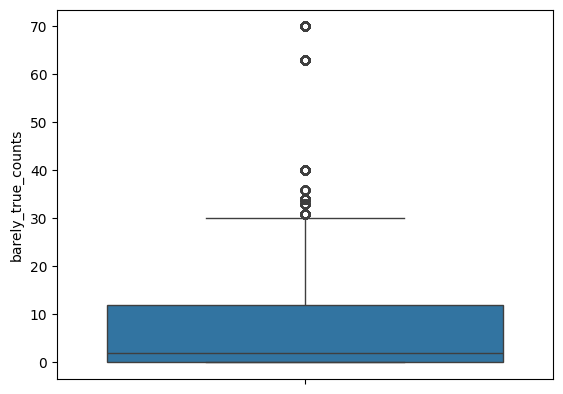

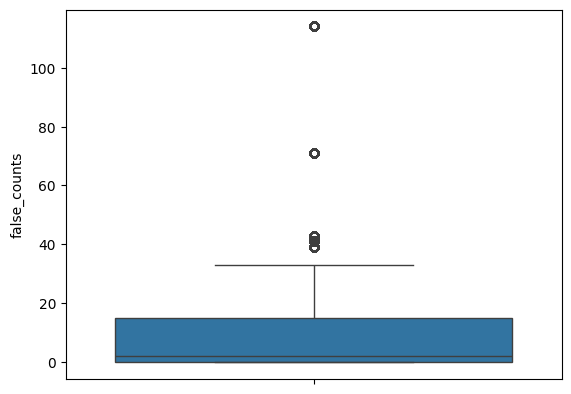

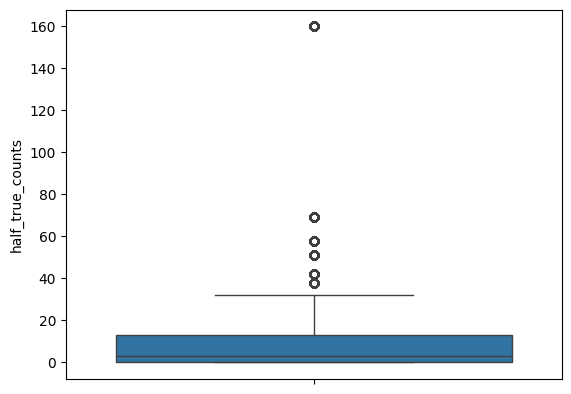

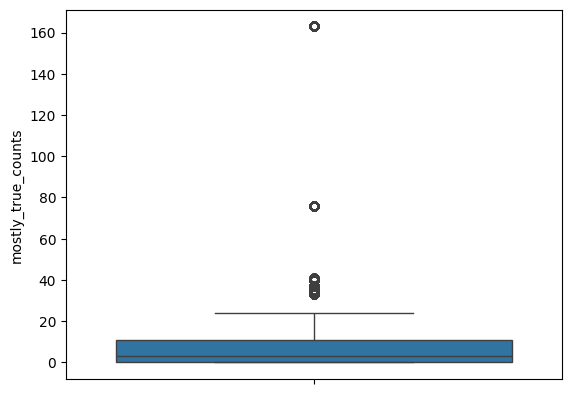

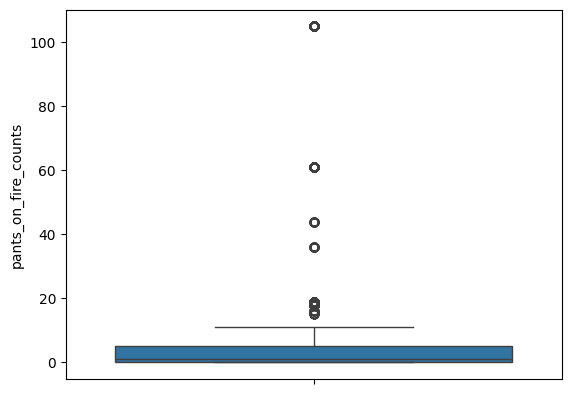

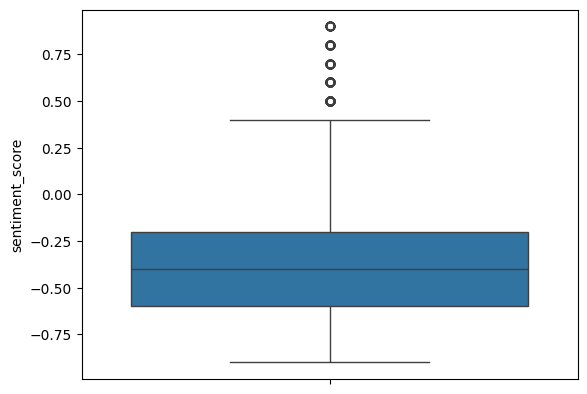

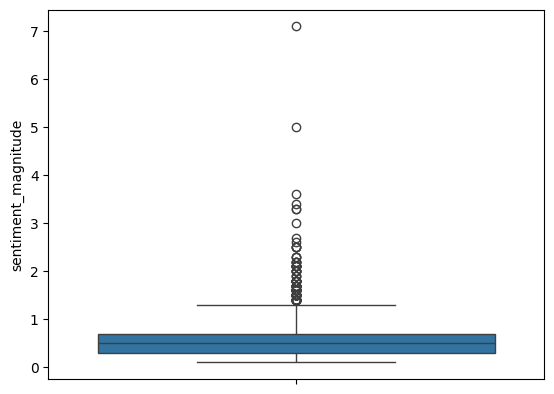

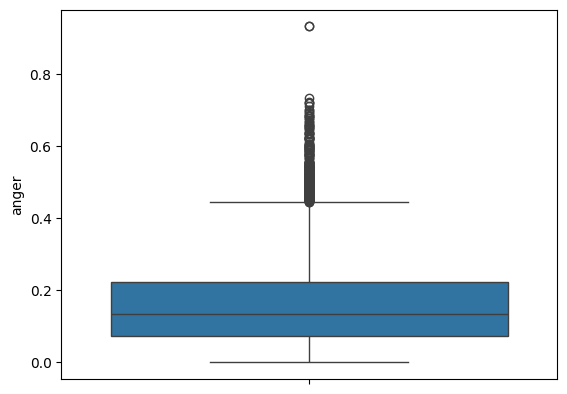

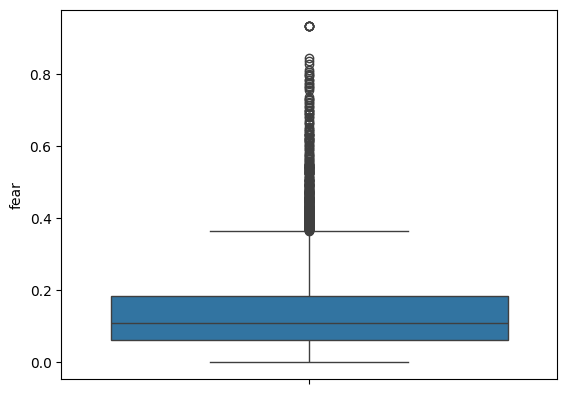

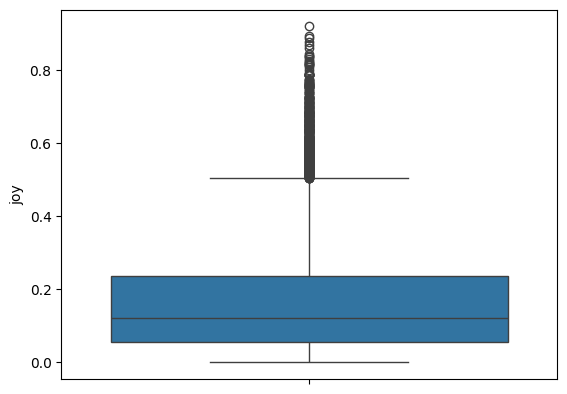

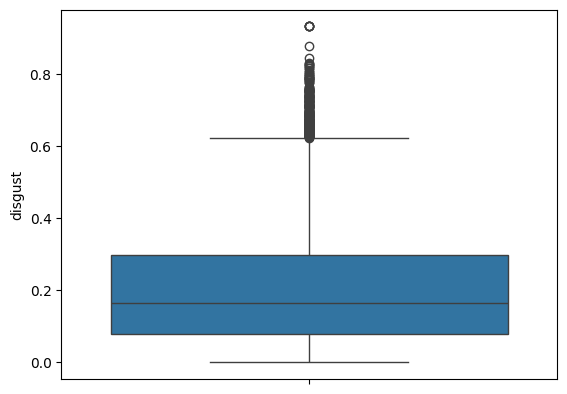

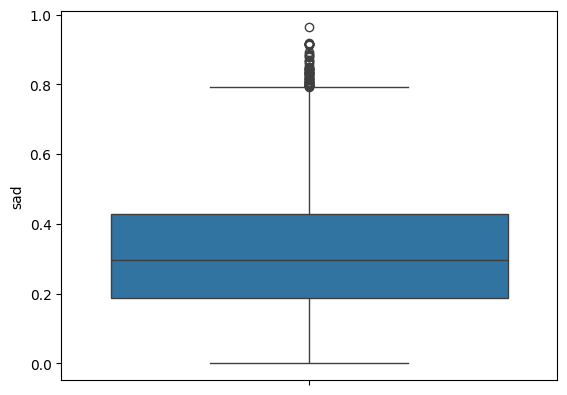

In [ ]:
#boxplot
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_columns:
  column = fake_news_drop[i]
  sns.boxplot(column)
  plt.show()

In [ ]:
import numpy as np
def remove_outliers_zscore(df, column, threshold=3):
  z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
  filtered_df = df[(z_scores < threshold)]
  return filtered_df

In [ ]:
for i in numerical_columns:
  fake_news_filtered_data = remove_outliers_zscore(fake_news_drop, i)

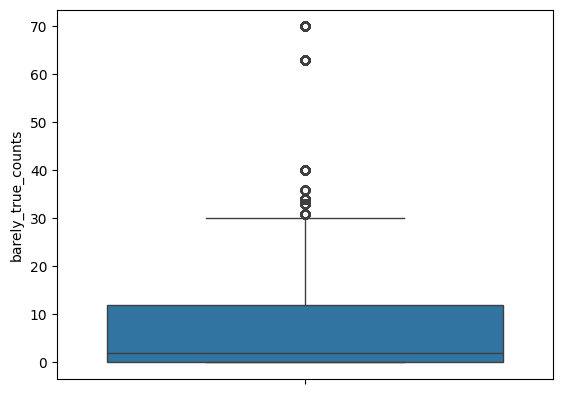

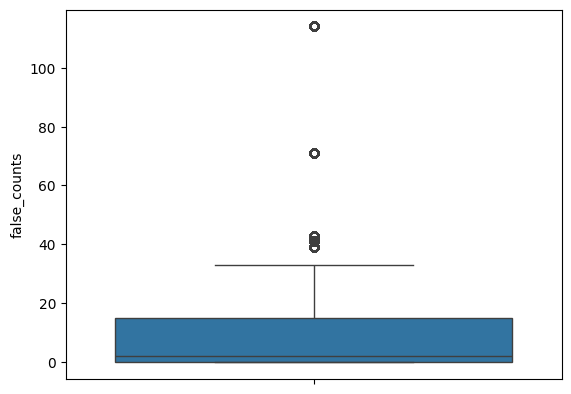

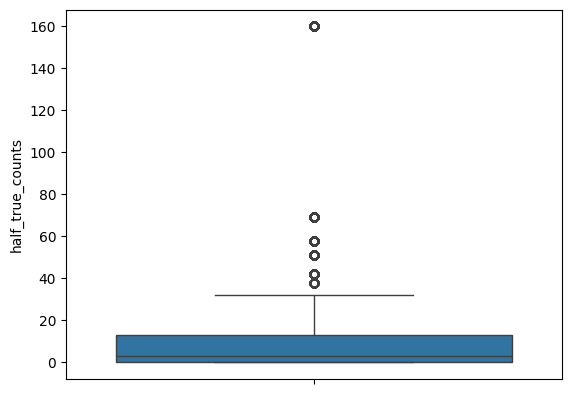

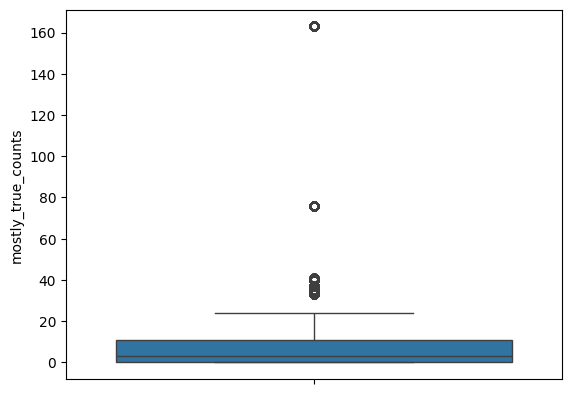

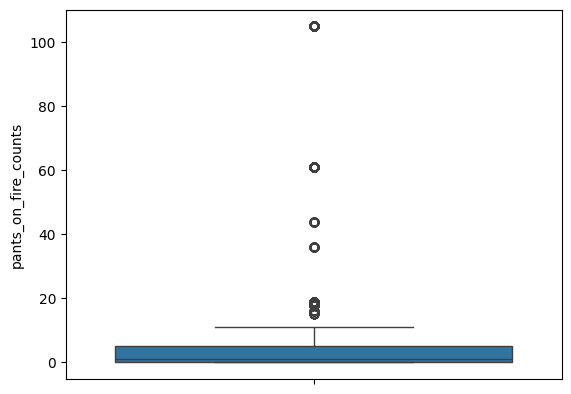

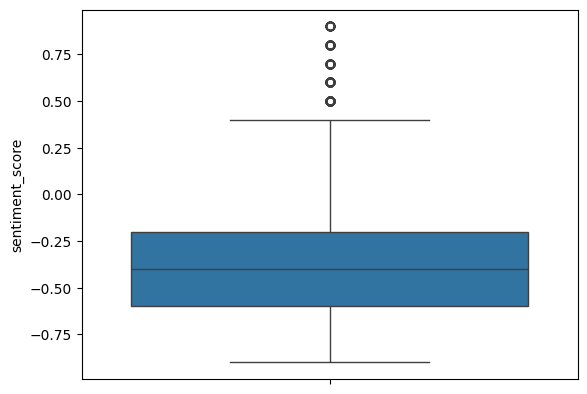

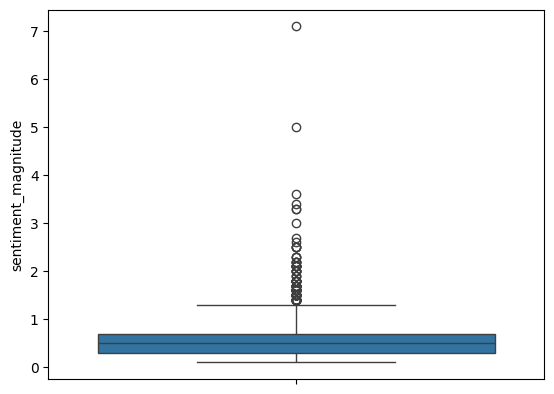

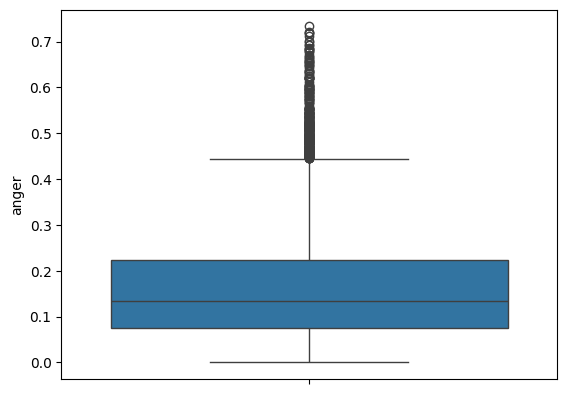

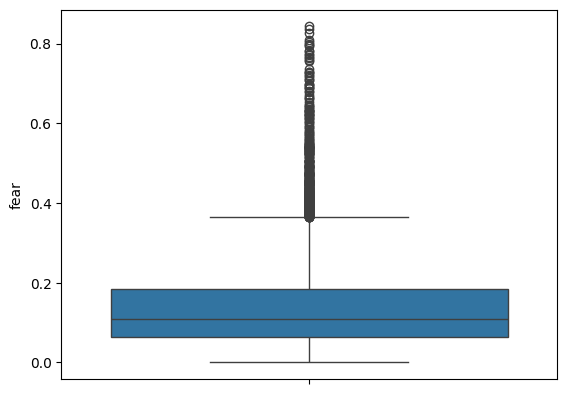

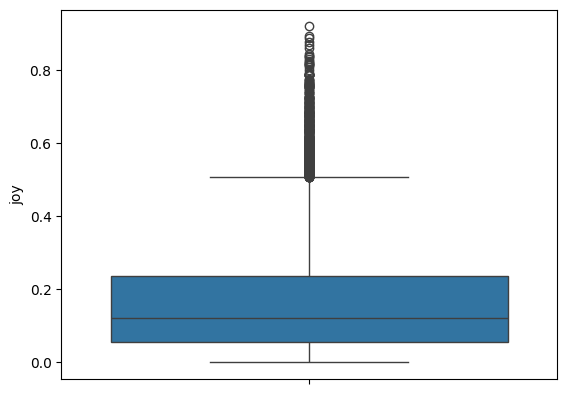

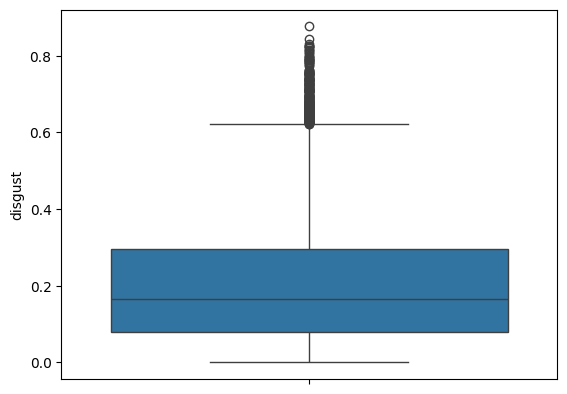

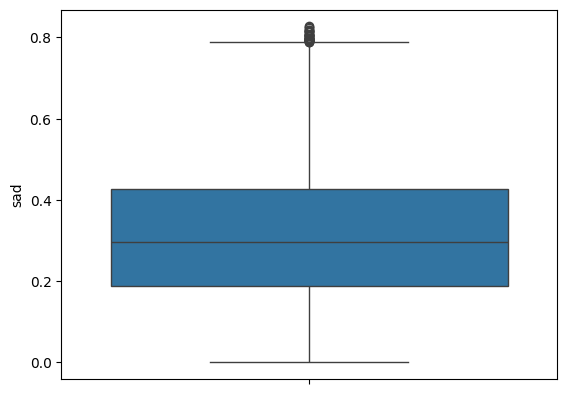

In [ ]:
#boxplot
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_columns:
  column = fake_news_filtered_data[i]
  sns.boxplot(column)
  plt.show()

In [ ]:
# fake_news_drop.to_csv("cleaned_data.csv", index=False)

#Data Visualization

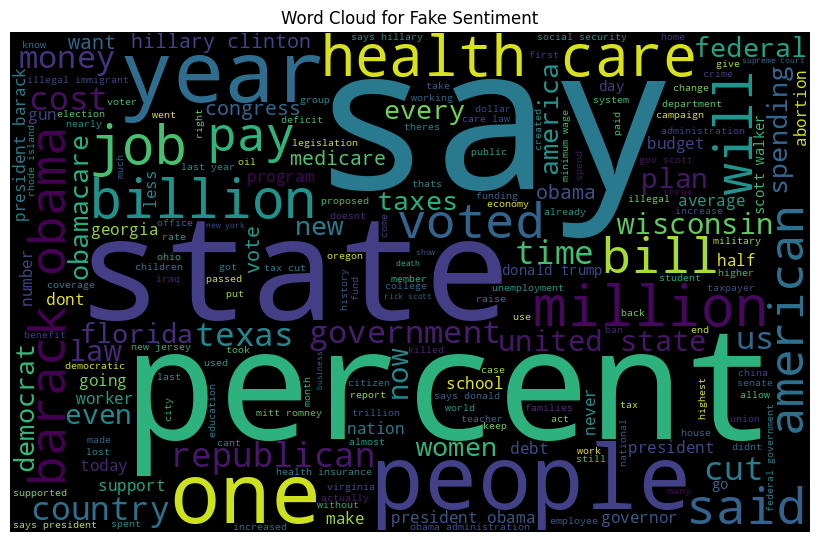

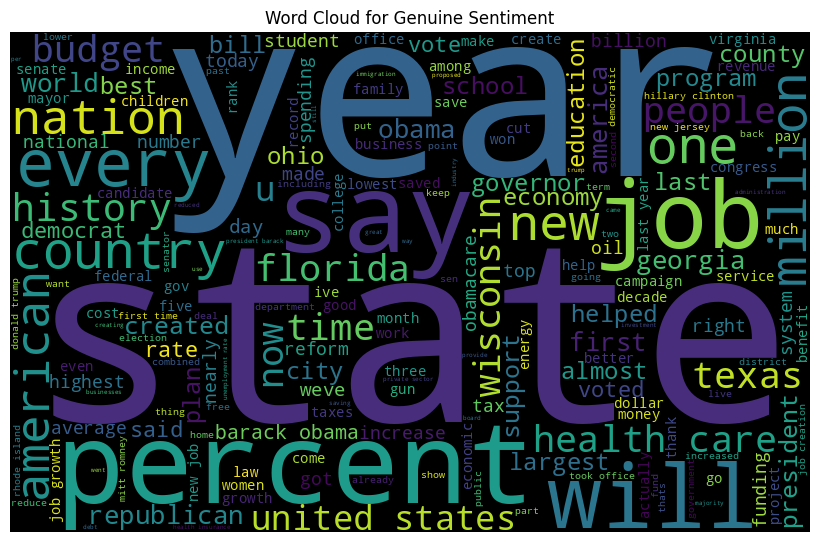

In [ ]:
from wordcloud import WordCloud

# Filter the DataFrame for Fake and Genuine sentiments
fake_df = fake_news_drop[fake_news_drop['sentiment'] == 'Fake']
genuine_df = fake_news_drop[fake_news_drop['sentiment'] == 'Genuine']

# Extract text data for Fake and Genuine sentiments
fake_text = ' '.join(fake_df['statement'])
genuine_text = ' '.join(genuine_df['statement'])

# Generate word clouds for Fake and Genuine sentiments
wordcloud_fake = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = None,
                min_font_size = 6).generate(fake_text)

wordcloud_genuine = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = None,
                min_font_size = 6).generate(genuine_text)

# Plot the word clouds
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_fake)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Fake Sentiment')
plt.show()

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_genuine)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Genuine Sentiment')
plt.show()


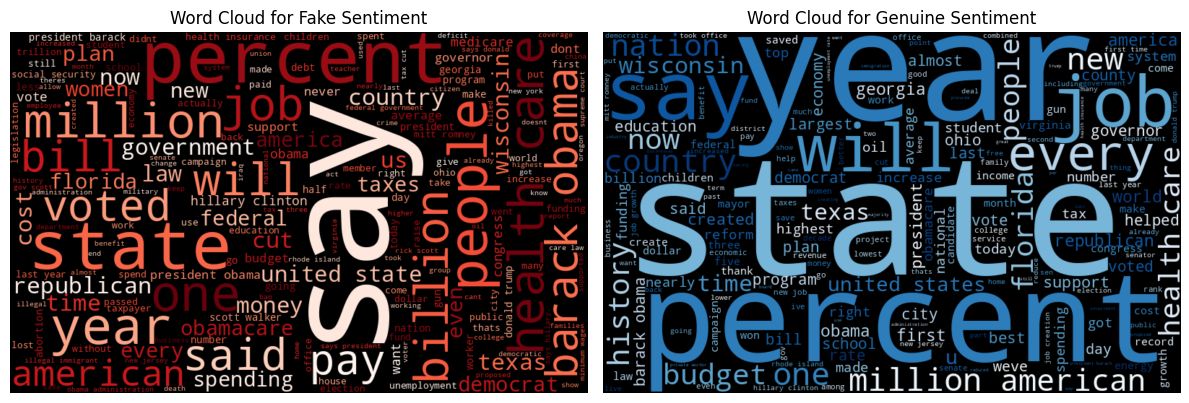

In [ ]:
# Filter the DataFrame for Fake and Genuine sentiments
fake_df = fake_news_drop[fake_news_drop['sentiment'] == 'Fake']
genuine_df = fake_news_drop[fake_news_drop['sentiment'] == 'Genuine']

# Extract text data for Fake and Genuine sentiments
fake_text = ' '.join(fake_df['statement'])
genuine_text = ' '.join(genuine_df['statement'])

# Generate word clouds for Fake and Genuine sentiments
wordcloud_fake = WordCloud(width=800, height=500, background_color='black', colormap='Reds').generate(fake_text)
wordcloud_genuine = WordCloud(width=800, height=500, background_color='black', colormap='Blues').generate(genuine_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_genuine, interpolation='bilinear')
plt.title('Word Cloud for Genuine Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

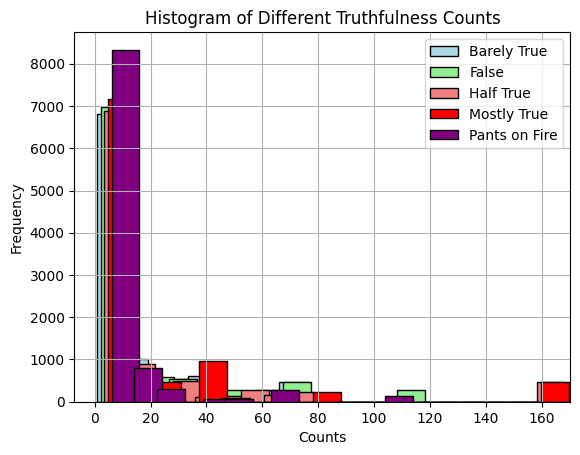

In [ ]:
# # Plot histogram of 'pants_on_fire_counts'
# plt.hist(fake_news_drop['pants_on_fire_counts'], bins=20, color='orange', edgecolor='black')
# plt.xlabel('Pants on Fire Counts')
# plt.ylabel('Frequency')
# plt.title('Histogram of Pants on Fire Counts')
# plt.grid(True)
# plt.show()

# Define the data for the histogram
counts = [fake_news_drop['barely_true_counts'], fake_news_drop['false_counts'], fake_news_drop['half_true_counts'], fake_news_drop['mostly_true_counts'], fake_news_drop['pants_on_fire_counts']]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'red', 'purple']
labels = ['Barely True', 'False', 'Half True', 'Mostly True', 'Pants on Fire']

# Plot histogram with multiple counts
plt.hist(counts, bins=20, color=colors, edgecolor='black', label=labels, width=10)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Different Truthfulness Counts')
plt.legend()
plt.grid(True)
plt.show()

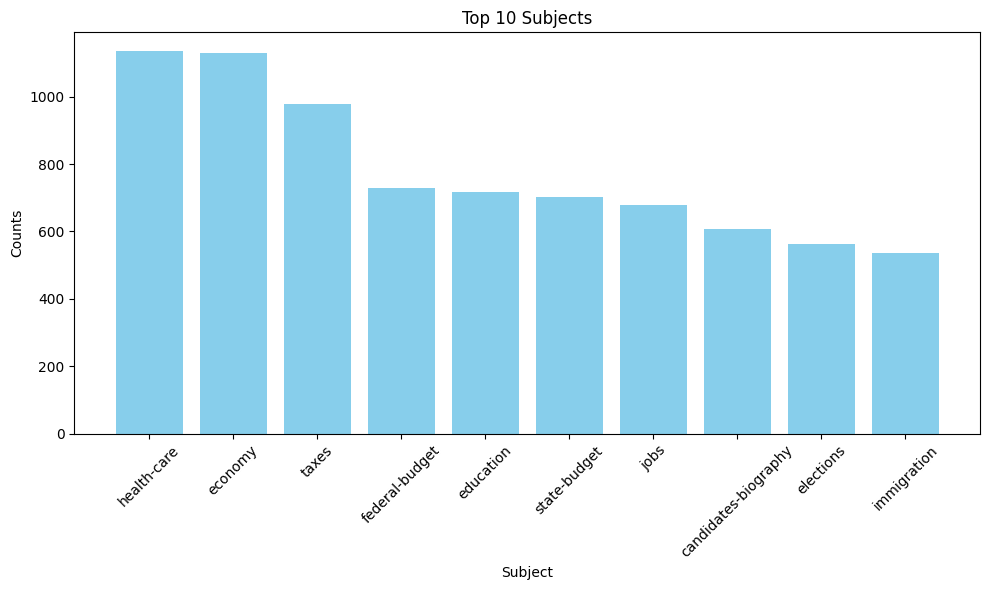

In [ ]:
# Sort subjects by their counts in descending order
subject_counts_sorted = subject_counts.sort_values(by='counts', ascending=False)

# Select only the top ten subjects
top_ten_subjects = subject_counts_sorted.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ten_subjects['subject'], top_ten_subjects['counts'], color='skyblue')
plt.xlabel('Subject')
plt.ylabel('Counts')
plt.title('Top 10 Subjects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

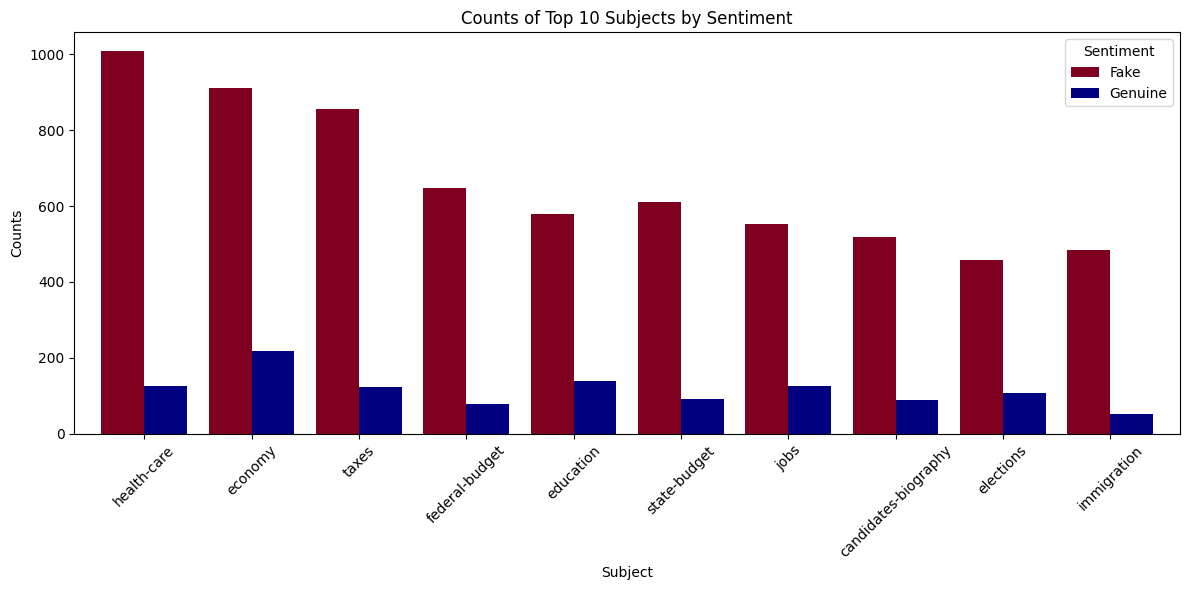

In [ ]:
# # Group by subject and sentiment, and count occurrences
# subject_sentiment_counts = fake_news_subject.groupby(['subject', 'sentiment']).size().reset_index(name='counts')

# # Pivot the table to have subjects as rows and sentiments as columns
# subject_sentiment_pivot = subject_sentiment_counts.pivot(index='subject', columns='sentiment', values='counts').fillna(0)

# # Calculate the total counts for each subject
# subject_sentiment_pivot['total_counts'] = subject_sentiment_pivot.sum(axis=1)

# # Sort the subjects based on total counts in descending order
# sorted_subjects = subject_sentiment_pivot.sort_values(by='total_counts', ascending=False)

# # Select only the top ten subjects
# top_ten_subjects = sorted_subjects.head(10)

# # Plot the grouped bar chart
# top_ten_subjects.drop('total_counts', axis=1).plot(kind='bar', figsize=(12, 6), width=0.8)
# plt.xlabel('Subject')
# plt.ylabel('Counts')
# plt.title('Counts of Top 10 Subjects by Sentiment')
# plt.xticks(rotation=45)
# plt.legend(title='Sentiment', labels=['Fake', 'Genuine'])
# plt.tight_layout()
# plt.show()

# Plot the grouped bar chart with specified colors for fake and genuine sentiments
top_ten_subjects.drop('total_counts', axis=1).plot(kind='bar', figsize=(12, 6), width=0.8, color=['#800020', '#000080'])

# Add labels, title, and adjust layout
plt.xlabel('Subject')
plt.ylabel('Counts')
plt.title('Counts of Top 10 Subjects by Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Fake', 'Genuine'])
plt.tight_layout()
plt.show()



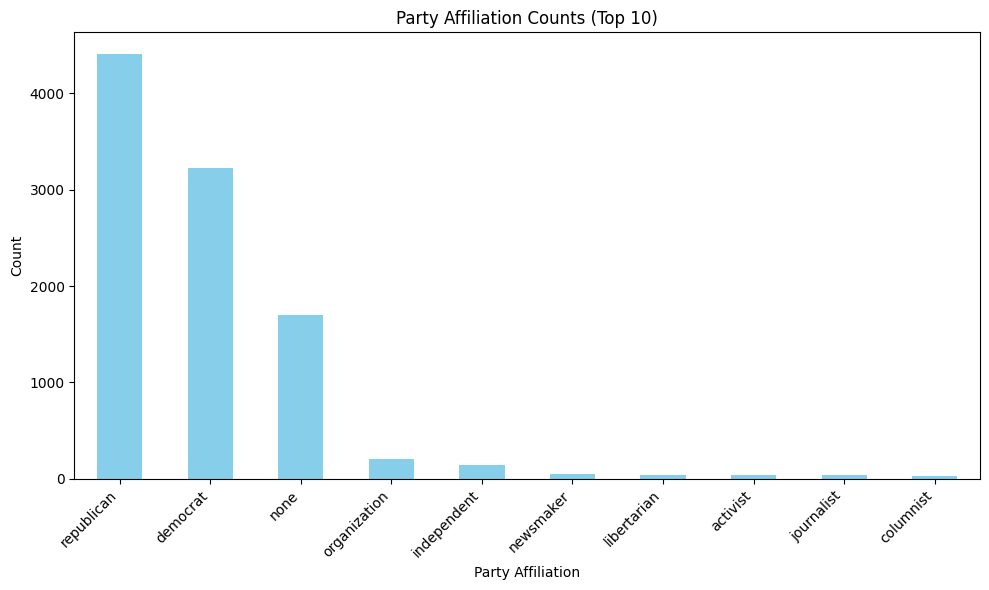

In [ ]:
# Filter to top 10 party affiliations
party_affiliation_counts = fake_news_drop['party_affiliation'].value_counts().head(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
party_affiliation_counts.plot(kind='bar', color='skyblue')
plt.title('Party Affiliation Counts (Top 10)')
plt.xlabel('Party Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

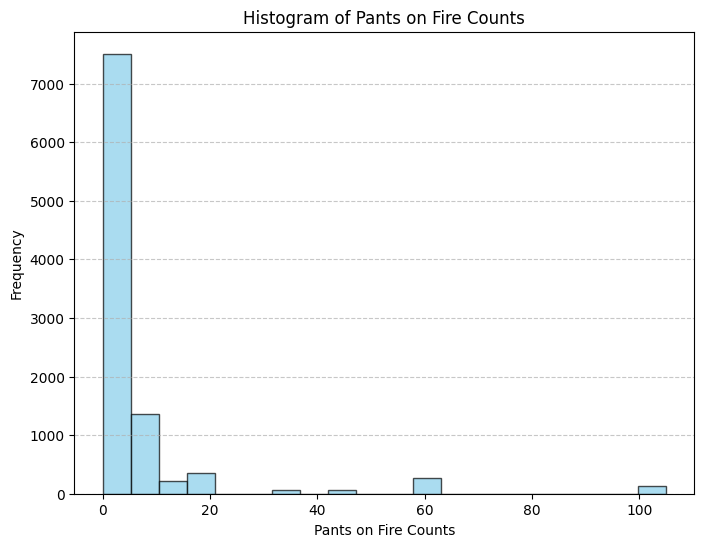

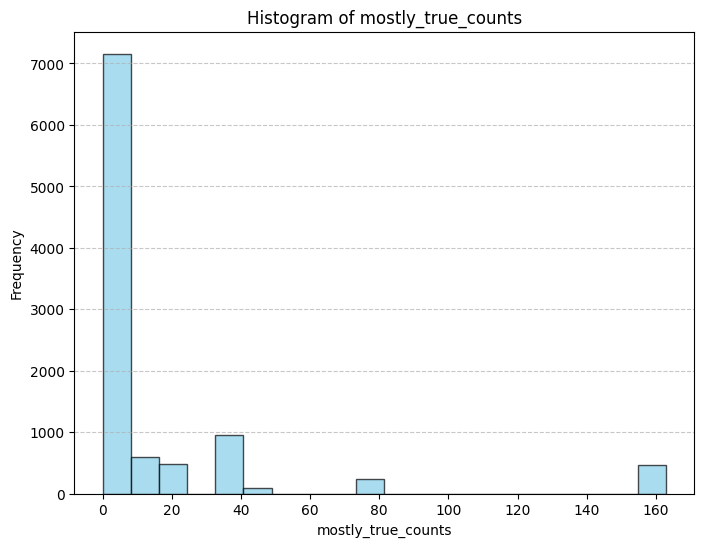

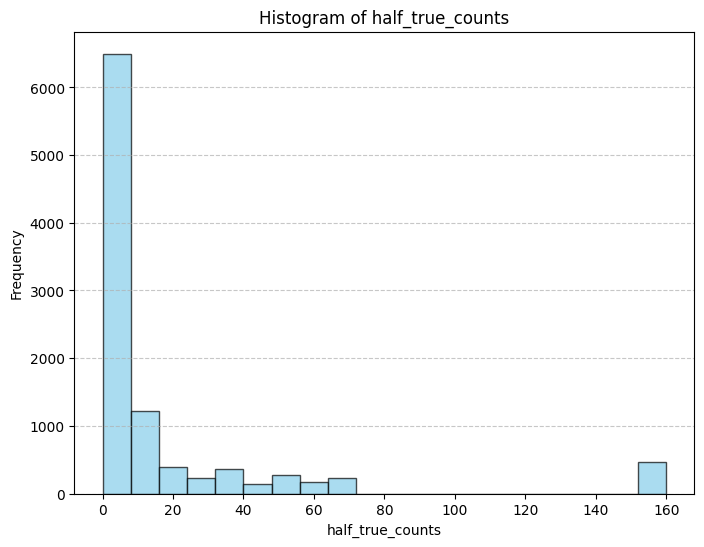

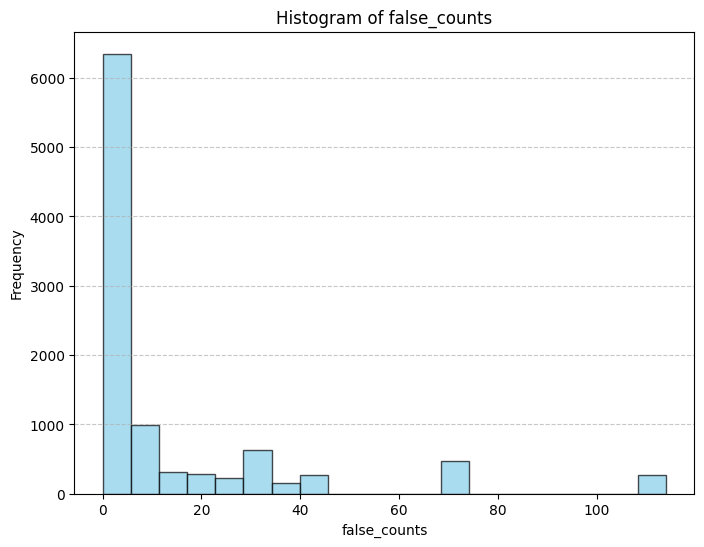

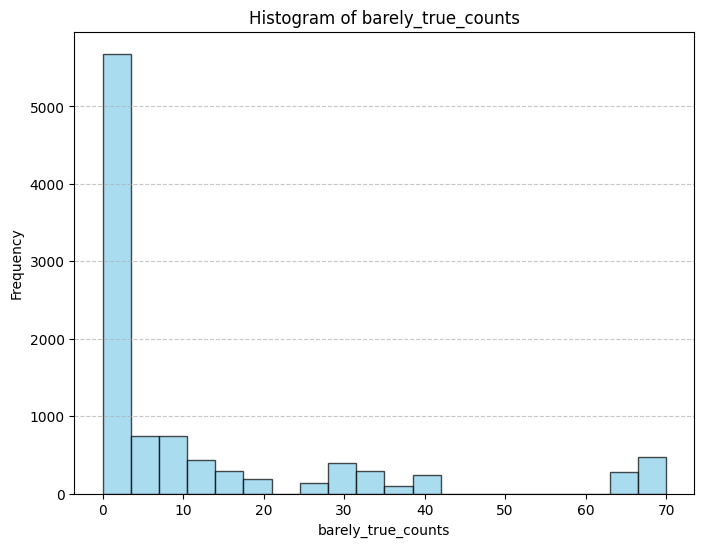

In [ ]:
import matplotlib.pyplot as plt

# Plotting histogram for pants on fire counts
plt.figure(figsize=(8, 6))
plt.hist(fake_news_drop['pants_on_fire_counts'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Pants on Fire Counts')
plt.xlabel('Pants on Fire Counts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting histogram for mostly_true_counts
plt.figure(figsize=(8, 6))
plt.hist(fake_news_drop['mostly_true_counts'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of mostly_true_counts')
plt.xlabel('mostly_true_counts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting histogram for half_true_counts
plt.figure(figsize=(8, 6))
plt.hist(fake_news_drop['half_true_counts'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of half_true_counts')
plt.xlabel('half_true_counts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting histogram for false_counts
plt.figure(figsize=(8, 6))
plt.hist(fake_news_drop['false_counts'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of false_counts')
plt.xlabel('false_counts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting histogram for barely_true_counts
plt.figure(figsize=(8, 6))
plt.hist(fake_news_drop['barely_true_counts'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of barely_true_counts')
plt.xlabel('barely_true_counts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

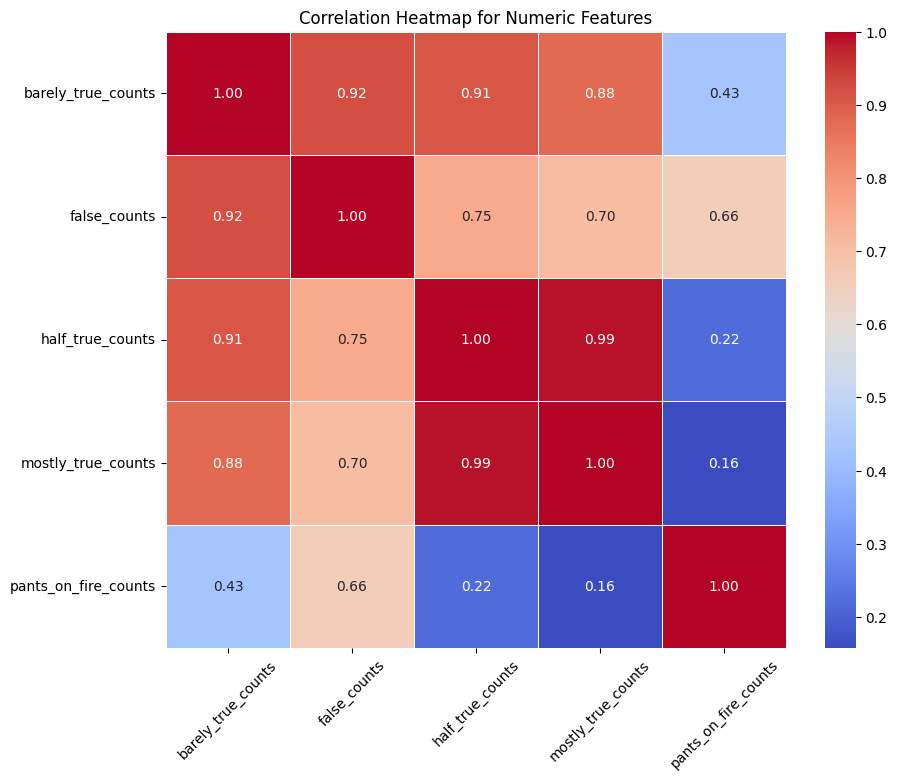

In [ ]:
# Selecting numeric features
numeric_features = ['barely_true_counts', 'false_counts', 'half_true_counts',
                    'mostly_true_counts', 'pants_on_fire_counts']

# Calculating correlation matrix
corr_matrix = fake_news_drop[numeric_features].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.xticks(rotation=45)
plt.show()

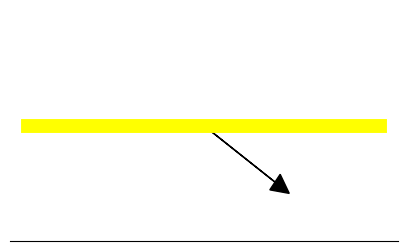

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_half_gauge(value, min_value, max_value):
    # Define colors for different ranges
    colors = ['#FF0000', '#FFFF00', '#00FF00']  # Green, Yellow, Red
    thresholds = [min_value, (min_value + max_value) / 2, max_value]

    # Determine color based on value
    color_index = sum(value > t for t in thresholds)
    color = colors[color_index]

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot a semi-circle
    ax.plot([-1, 1], [0, 0], color='black')  # Base line
    ax.plot([-1, 1], [0, 0], color=color, linewidth=10)  # Gauge line

    # Plot arrow
    arrow_len = 0.5
    arrow_angle = (value - min_value) / (max_value - min_value) * 180 - 90
    ax.arrow(0, 0, np.cos(np.radians(arrow_angle)) * arrow_len, np.sin(np.radians(arrow_angle)) * arrow_len,
             head_width=0.1, head_length=0.1, fc='k', ec='k')

    # Hide spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Set ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-0.6, 0.6)

    plt.show()

# Example usage:
value = 30
min_value = 0
max_value = 100
draw_half_gauge(value, min_value, max_value)

In [ ]:
# # Aggregate truthfulness ratings
# fake_news_drop['truthfulness_rating'] = fake_news_drop[['barely_true_counts', 'false_counts', 'half_true_counts',
#                                 'mostly_true_counts', 'pants_on_fire_counts']].max(axis=1)

# # Create scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(fake_news_drop['sentiment_score'], fake_news_drop['truthfulness_rating'], color='skyblue')

# # Add labels and title
# plt.xlabel('Sentiment Score')
# plt.ylabel('Truthfulness Rating')
# plt.title('Sentiment Score vs Truthfulness Rating')

# # Show plot
# # plt.grid(True)
# plt.show()

In [ ]:
# # Convert values in the 'subject' column to strings
# fake_news_drop['subject'] = fake_news_drop['subject'].astype(str)

# # Convert values in the 'sentiment' column to strings
# fake_news_drop['sentiment'] = fake_news_drop['sentiment'].astype(str)

# # Create the Subject vs. Sentiment Frequency Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(pd.crosstab(fake_news_drop['subject'], fake_news_drop['sentiment']), cmap='Blues', annot=True, fmt='d')
# plt.title('Subject vs. Sentiment Frequency Heatmap')
# plt.xlabel('Sentiment')
# plt.ylabel('Subject')
# plt.show()

In [ ]:
# print(fake_news_drop.columns)

# # Select only the numeric columns from the DataFrame
# numeric_df = fake_news_drop['barely_true_counts',	'false_counts',	'half_true_counts',	'mostly_true_counts',	'pants_on_fire_counts']

# # Compute the correlation matrix
# correlation_matrix = numeric_df.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap of Numeric Features')
# plt.show()

# Data Modeling

# Data Evaluation

# SPARK

In [ ]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.4.2'
spark_version = 'spark-3.4.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,641 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,081 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-upd

In [ ]:
# Import packages
from pyspark.sql import SparkSession
import time

# Initialize Spark session with AWS libraries
spark = SparkSession.builder \
    .appName("Fake News") \
    .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.3.1") \
    .getOrCreate()

In [ ]:
# Read in the AWS S3 bucket into a DataFrame.
from pyspark import SparkFiles

df = spark.read.csv("s3a://p4.fn/cleaned_data.csv", header=True)

df.show()

Py4JJavaError: An error occurred while calling o31.csv.
: java.nio.file.AccessDeniedException: s3a://p4.fn/cleaned_data.csv: org.apache.hadoop.fs.s3a.auth.NoAuthWithAWSException: No AWS Credentials provided by TemporaryAWSCredentialsProvider SimpleAWSCredentialsProvider EnvironmentVariableCredentialsProvider IAMInstanceCredentialsProvider : com.amazonaws.SdkClientException: Unable to load AWS credentials from environment variables (AWS_ACCESS_KEY_ID (or AWS_ACCESS_KEY) and AWS_SECRET_KEY (or AWS_SECRET_ACCESS_KEY))
	at org.apache.hadoop.fs.s3a.S3AUtils.translateException(S3AUtils.java:206)
	at org.apache.hadoop.fs.s3a.S3AUtils.translateException(S3AUtils.java:170)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.s3GetFileStatus(S3AFileSystem.java:3289)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.innerGetFileStatus(S3AFileSystem.java:3185)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.getFileStatus(S3AFileSystem.java:3053)
	at org.apache.hadoop.fs.FileSystem.exists(FileSystem.java:1760)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.exists(S3AFileSystem.java:4263)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$checkAndGlobPathIfNecessary$4(DataSource.scala:756)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$checkAndGlobPathIfNecessary$4$adapted(DataSource.scala:754)
	at org.apache.spark.util.ThreadUtils$.$anonfun$parmap$2(ThreadUtils.scala:393)
	at scala.concurrent.Future$.$anonfun$apply$1(Future.scala:659)
	at scala.util.Success.$anonfun$map$1(Try.scala:255)
	at scala.util.Success.map(Try.scala:213)
	at scala.concurrent.Future.$anonfun$map$1(Future.scala:292)
	at scala.concurrent.impl.Promise.liftedTree1$1(Promise.scala:33)
	at scala.concurrent.impl.Promise.$anonfun$transform$1(Promise.scala:33)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at java.base/java.util.concurrent.ForkJoinTask$RunnableExecuteAction.exec(ForkJoinTask.java:1426)
	at java.base/java.util.concurrent.ForkJoinTask.doExec(ForkJoinTask.java:290)
	at java.base/java.util.concurrent.ForkJoinPool$WorkQueue.topLevelExec(ForkJoinPool.java:1020)
	at java.base/java.util.concurrent.ForkJoinPool.scan(ForkJoinPool.java:1656)
	at java.base/java.util.concurrent.ForkJoinPool.runWorker(ForkJoinPool.java:1594)
	at java.base/java.util.concurrent.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:183)
Caused by: org.apache.hadoop.fs.s3a.auth.NoAuthWithAWSException: No AWS Credentials provided by TemporaryAWSCredentialsProvider SimpleAWSCredentialsProvider EnvironmentVariableCredentialsProvider IAMInstanceCredentialsProvider : com.amazonaws.SdkClientException: Unable to load AWS credentials from environment variables (AWS_ACCESS_KEY_ID (or AWS_ACCESS_KEY) and AWS_SECRET_KEY (or AWS_SECRET_ACCESS_KEY))
	at org.apache.hadoop.fs.s3a.AWSCredentialProviderList.getCredentials(AWSCredentialProviderList.java:216)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.getCredentialsFromContext(AmazonHttpClient.java:1257)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.runBeforeRequestHandlers(AmazonHttpClient.java:833)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.doExecute(AmazonHttpClient.java:783)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.executeWithTimer(AmazonHttpClient.java:770)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.execute(AmazonHttpClient.java:744)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutor.access$500(AmazonHttpClient.java:704)
	at com.amazonaws.http.AmazonHttpClient$RequestExecutionBuilderImpl.execute(AmazonHttpClient.java:686)
	at com.amazonaws.http.AmazonHttpClient.execute(AmazonHttpClient.java:550)
	at com.amazonaws.http.AmazonHttpClient.execute(AmazonHttpClient.java:530)
	at com.amazonaws.services.s3.AmazonS3Client.invoke(AmazonS3Client.java:5227)
	at com.amazonaws.services.s3.AmazonS3Client.getBucketRegionViaHeadRequest(AmazonS3Client.java:6189)
	at com.amazonaws.services.s3.AmazonS3Client.fetchRegionFromCache(AmazonS3Client.java:6162)
	at com.amazonaws.services.s3.AmazonS3Client.invoke(AmazonS3Client.java:5211)
	at com.amazonaws.services.s3.AmazonS3Client.invoke(AmazonS3Client.java:5173)
	at com.amazonaws.services.s3.AmazonS3Client.getObjectMetadata(AmazonS3Client.java:1360)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.lambda$getObjectMetadata$6(S3AFileSystem.java:2066)
	at org.apache.hadoop.fs.s3a.Invoker.retryUntranslated(Invoker.java:412)
	at org.apache.hadoop.fs.s3a.Invoker.retryUntranslated(Invoker.java:375)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.getObjectMetadata(S3AFileSystem.java:2056)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.getObjectMetadata(S3AFileSystem.java:2032)
	at org.apache.hadoop.fs.s3a.S3AFileSystem.s3GetFileStatus(S3AFileSystem.java:3273)
	... 20 more
Caused by: com.amazonaws.SdkClientException: Unable to load AWS credentials from environment variables (AWS_ACCESS_KEY_ID (or AWS_ACCESS_KEY) and AWS_SECRET_KEY (or AWS_SECRET_ACCESS_KEY))
	at com.amazonaws.auth.EnvironmentVariableCredentialsProvider.getCredentials(EnvironmentVariableCredentialsProvider.java:50)
	at org.apache.hadoop.fs.s3a.AWSCredentialProviderList.getCredentials(AWSCredentialProviderList.java:177)
	... 41 more
